# Project DSC 2024 - DSC000

## 1. Tujuan dan Batasan Masalah

Tujuan : membuat model untuk memprediksi tipe kualitas apel (good or bad) berdasarkan beberapa variabel yang diberikan

Batasan masalah : variabel yang diberikan antara lain size, weight, sweetness, crunchiness, juiciness, ripeness, acidity

Kriteria keberhasilan : Performa model dalam memprediksi tipe quality apel di data tes memiliki kecocokan yang tinggi (high predict performance).

## 2. Pengetahuan Data

Berikut adalah path untuk masing-masing data (dalam Kaggle):
1. `sample submission` : /kaggle/input/dsc-2024-temporary/sample_submission.csv
2. `train set`         : /kaggle/input/dsc-2024-temporary/train.csv
3. `test set`          : /kaggle/input/dsc-2024-temporary/test.csv

In [1]:
# Import Library

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 

In [2]:
train = pd.read_csv("train.csv")
train.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-0.155024,-1.901167,2.615144,1.091245,1.642629,0.378677,-1.705312,good
1,1,-2.730624,-1.808060,-4.085386,0.172564,-1.579260,3.380989,-3.847081,bad
2,2,-0.599057,2.046434,-2.877662,0.505389,0.228996,1.890559,2.211756,bad
3,3,-2.010945,-1.426566,-2.334610,1.302376,0.142687,3.922959,0.017695,bad
4,4,-1.977980,-0.229483,1.283458,0.238898,1.049935,0.682324,0.369580,good


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         2800 non-null   int64  
 1   Size         2800 non-null   float64
 2   Weight       2800 non-null   float64
 3   Sweetness    2800 non-null   float64
 4   Crunchiness  2800 non-null   float64
 5   Juiciness    2800 non-null   float64
 6   Ripeness     2800 non-null   float64
 7   Acidity      2800 non-null   float64
 8   Quality      2800 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 197.0+ KB


Data memiliki 2800 observasi dan tidak ada yang kosong (NA) di tiap observasi di tiap kolomnya. Data terdiri dari 8 Kolom berisi 8 variabel. Variabel tersebut antara lain A_id (id apel) dengan tipe integer, Size (ukuran apel) dengan tipe float, Weight (berat apel) dengan tipe float, Sweetness (kadar kemanisan apel) dengan tipe float, Crunchiness (kadar kerenyahan apel) dengan tipe float, Juiciness (kadar air dalam apel) dengan tipe float, Ripeness (kadar kematangan apel) dengan tipe float, Acidity (kadar keasaman apel) dengan tipe float, dan Quality (kategori baik/tidak-nya apel) dengan tipe object (category, berarti bukan numeric),

Di sini, independent/features/predictor variables adalah semua variabel selain Quality dan A_id. Quality akan menjadi predicted/dependent variable. Sementara A_id tidak dipakai dalam memprediksi Quality (kualitas apel).

Karena predicted variable berupa data categoric, maka proses prediksi akan menggunakan metode classification.

## 3. Data Preprocessing

In [6]:
# Data duplikat

train.drop_duplicates()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         2800 non-null   int64  
 1   Size         2800 non-null   float64
 2   Weight       2800 non-null   float64
 3   Sweetness    2800 non-null   float64
 4   Crunchiness  2800 non-null   float64
 5   Juiciness    2800 non-null   float64
 6   Ripeness     2800 non-null   float64
 7   Acidity      2800 non-null   float64
 8   Quality      2800 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 197.0+ KB


In [7]:
train.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1399.500000,-0.514743,-0.995706,-0.431350,1.001451,0.511097,0.481112,0.108868
std,808.434702,1.930621,1.609845,1.970578,1.399908,1.934171,1.856247,2.093538
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-6.739693
25%,699.750000,-1.850394,-2.020728,-1.741682,0.092788,-0.789481,-0.765048,-1.337362
50%,1399.500000,-0.514732,-0.988641,-0.498620,1.030332,0.517691,0.491046,0.041436
75%,2099.250000,0.820971,0.035267,0.846253,1.902271,1.843950,1.718011,1.562816
max,2799.000000,6.406367,5.790714,6.374916,7.561485,7.364403,5.917886,7.404736


In [8]:
# Stardized, menggunakan scaling
train_scaled = train.copy()

# mengecualikan A-id dan Quality
train_scaled.drop(['A_id','Quality'], axis=1, inplace=True)

for column in train_scaled.columns : 
#     train_scaled[column] = (train_scaled[column] - train_scaled[column].min()) / (train_scaled[column].max() - train_scaled.min())
    train_scaled[column] = round((train_scaled[column] - train_scaled[column].mean()) / train_scaled[column].std(), 3) 
    
train_scaled.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,2800.000000,2800.000000,2800.000000,2.800000e+03,2800.000000,2800.000000,2800.000000
mean,0.000001,0.000004,0.000002,-7.142857e-07,-0.000004,-0.000001,-0.000003
std,0.999994,1.000007,0.999998,9.999968e-01,1.000006,0.999991,1.000010
min,-3.438000,-3.823000,-3.280000,-5.041000e+00,-3.347000,-3.419000,-3.271000
25%,-0.691750,-0.636500,-0.665250,-6.490000e-01,-0.672250,-0.671000,-0.690500
50%,0.000000,0.004000,-0.034000,2.050000e-02,0.003000,0.005500,-0.032500
75%,0.691500,0.640250,0.648500,6.432500e-01,0.689250,0.666250,0.694500
max,3.585000,4.216000,3.454000,4.686000e+00,3.543000,2.929000,3.485000


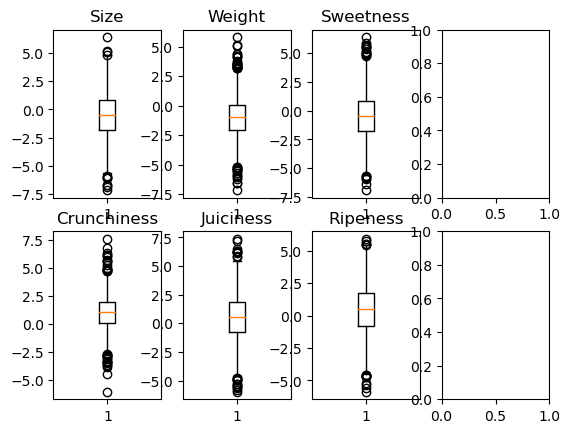

In [9]:
## Find Outlier
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2,4)

i = 0
for x in range (2) : 
    for y in range (4) :
        if y!=3 :
            axis[x,y].boxplot(train[train_scaled.columns[i]])
            axis[x,y].set_title(train_scaled.columns[i])
            i += 1

plt.show()

Data features/independent/predictor variables, setelah di-standarisasi, memiliki sebaran/distiribusi yang rata sehingga tidak memiliki outlier. Selain itu, data juga tidak mengandung missing value dan data duplikat

## 4. Exploratory Data Analysis (EDA)

<AxesSubplot: xlabel='Size', ylabel='Quality'>

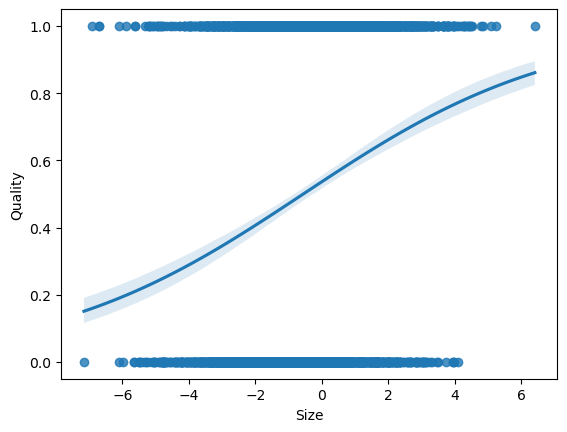

In [8]:
import seaborn as sns

train_1 = train.copy()
# good = 1, bad = 0
train_1['Quality'] = train_1['Quality'].replace(['good','bad'],[1,0])
sns.regplot(data=train_1, x="Size", y="Quality", logistic=True)

<AxesSubplot: xlabel='Weight', ylabel='Quality'>

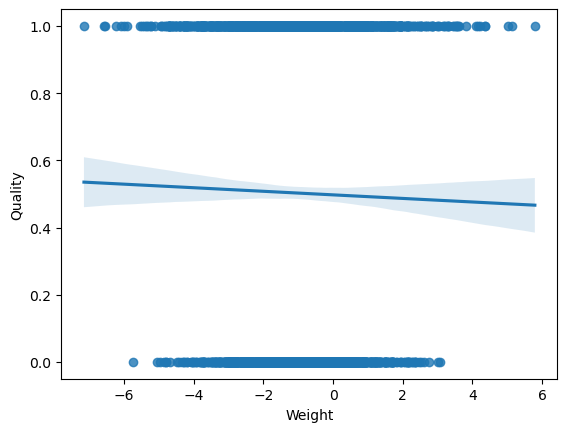

In [9]:
sns.regplot(data=train_1, x="Weight", y="Quality", logistic=True)

<AxesSubplot: xlabel='Sweetness', ylabel='Quality'>

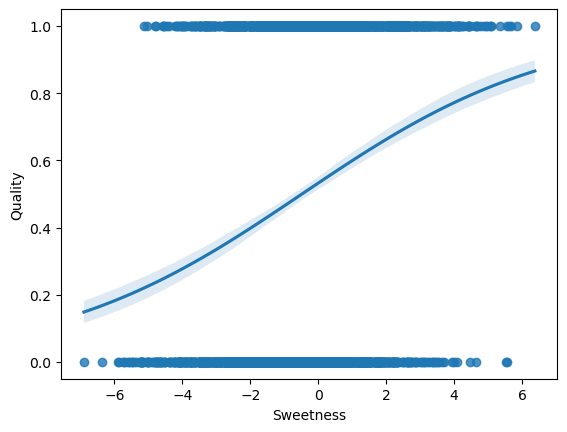

In [10]:
sns.regplot(data=train_1, x="Sweetness", y="Quality", logistic=True)

<AxesSubplot: xlabel='Crunchiness', ylabel='Quality'>

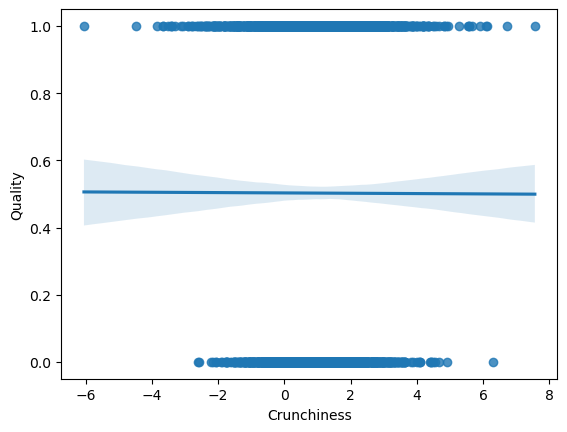

In [11]:
sns.regplot(data=train_1, x="Crunchiness", y="Quality", logistic=True)

<AxesSubplot: xlabel='Juiciness', ylabel='Quality'>

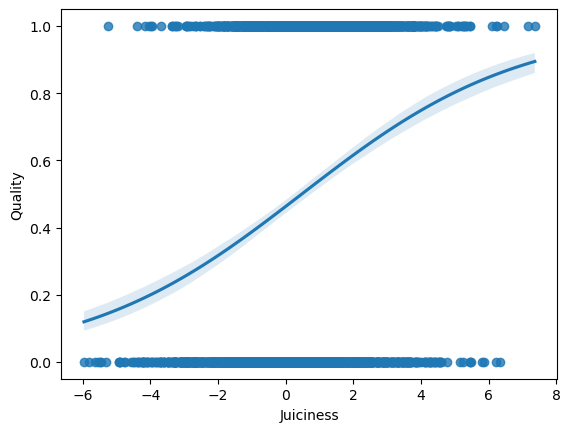

In [12]:
sns.regplot(data=train_1, x="Juiciness", y="Quality", logistic=True)

<AxesSubplot: xlabel='Ripeness', ylabel='Quality'>

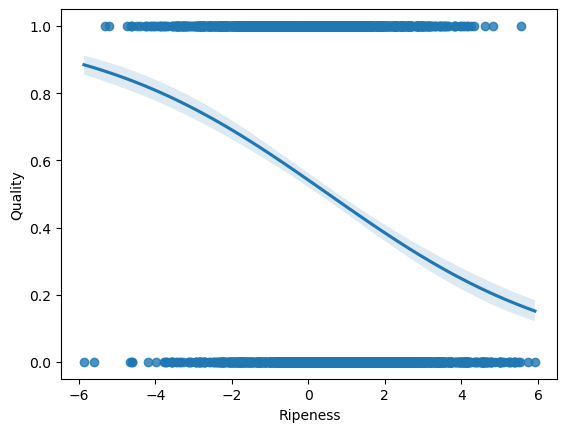

In [13]:
sns.regplot(data=train_1, x="Ripeness", y="Quality", logistic=True)

<AxesSubplot: xlabel='Acidity', ylabel='Quality'>

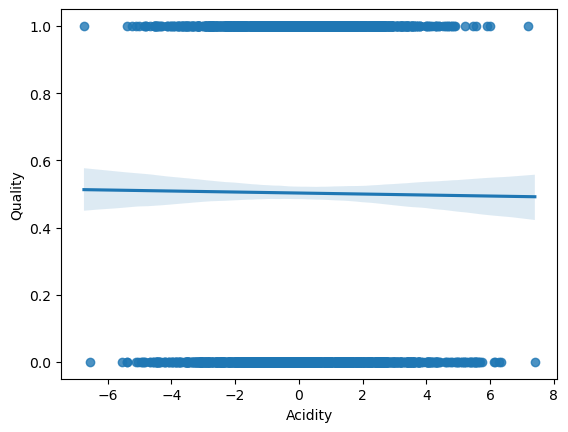

In [14]:
sns.regplot(data=train_1, x="Acidity", y="Quality", logistic=True)

In [15]:
## statistika deskriptif
train.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1399.500000,-0.514743,-0.995706,-0.431350,1.001451,0.511097,0.481112,0.108868
std,808.434702,1.930621,1.609845,1.970578,1.399908,1.934171,1.856247,2.093538
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-6.739693
25%,699.750000,-1.850394,-2.020728,-1.741682,0.092788,-0.789481,-0.765048,-1.337362
50%,1399.500000,-0.514732,-0.988641,-0.498620,1.030332,0.517691,0.491046,0.041436
75%,2099.250000,0.820971,0.035267,0.846253,1.902271,1.843950,1.718011,1.562816
max,2799.000000,6.406367,5.790714,6.374916,7.561485,7.364403,5.917886,7.404736


<AxesSubplot: >

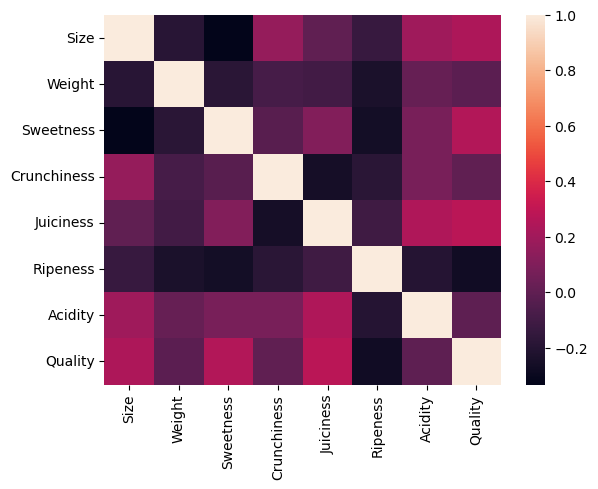

In [27]:
# train_2 = sns.load_dataset("train").pivot(index="", columns="", values="Score")
sns.heatmap(train_1.corr())
# train_1 = train_1.drop('A_id', axis=1)
# train_1.head()

variabel yang memiliki korelasi cukup kuat dengan kualitas apel, antara lain Size (ukuran), Sweetness (tingkat kemanisan), dan juiciness (kadar air di dalam apel). Hal ini juga dapat dilihat dari scatter plot antar masing-masing features/independent/predictor variables dengan variabel Quality. Pada Size, sweetness, dan Juiciness terlihat pola membentuk grafik regresi logistic. Hal ini menunjukkan pada range tertentu di variable-variable tersebut, maka tipe Quality (kualitas apel) akan berbeda.

## 5. Pembuatan Model

In [10]:
# Encode target variable
label_encoder = LabelEncoder()
train["Quality"] = label_encoder.fit_transform(train["Quality"])
# train["Quality"].dtype

In [11]:
# Split X dan y
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

y.value_counts(normalize=True)

1    0.5025
0    0.4975
Name: Quality, dtype: float64

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
RocCurveDisplay,
f1_score,
make_scorer,
recall_score,
roc_curve,
confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# TunedThresholdClassifierCV
from sklearn.pipeline import make_pipeline

In [16]:
test = pd.read_csv("test.csv")

In [17]:
# Fit Model
model = RandomForestClassifier()
model.fit(X,y)

model.score(X,y)

1.0

In [18]:
# lr_model = LogisticRegression(max_iter = 1000, random_state=2024)
# lr_model = LogisticRegression(max_iter = 2000, random_state=42)
# lr_model.fit(X,y)

Model yang dipakai adalah Random Forest Classifier yang didapat dari library. Sebelum itu, dilakukan label encoding terhadap variable Quality, agar menjadi numeric ('1' untuk 'Good' dan '0' untuk 'Bad'). Lalu, dilakukakn split data menjadi data X untuk semua data predictor/independent/feature variables dan data y untuk variabel predicted/dependent.

## 6. Evaluasi Model

In [31]:
# lr_model.score(X,y)

In [21]:
# create stratifiedkfold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_f1_scores = cross_val_score(
    RandomForestClassifier(), 
    X,
    y,
    cv=skf,
    scoring='f1'
)

print("Cross-validated F1-scores:", cv_f1_scores)

average_f1 = cv_f1_scores.mean()
print("Average F1-score:", round((average_f1),3))

Cross-validated F1-scores: [0.88421053 0.88041594 0.8892922  0.87847222 0.86805556]
Average F1-score: 0.88


Untuk mengevaluasi performa model, diperlukan cross validation menggunakan metode stratified k fold dengan di-split menjadi 5. Evaluation metric yang digunakan adalah F1 scorer.

Hasil rata-rata score di tiap data train yang di split setelah cross-validation adalah 0.88

## 7. Prediksi Kualitas Apel & File Submisi

Pastikan format file hasil prediksi sesuai dengan `sample_submission.csv` dan file submisi disimpan dengan nama `submission.csv`. Pastikan pula variabel `Quality` memiliki nilai bertipe string (`good` atau `bad`)

In [38]:
test = pd.read_csv("test.csv")

In [40]:
prediction = model.predict(test)
prediction = label_encoder.inverse_transform(prediction)

submission = pd.DataFrame(data={"A_id": test["A_id"], "Quality": prediction})
submission["Quality"] = submission["Quality"].replace([1,0], ['good','bad'])
submission.head()
submission.to_csv("submission.csv", index=False)

,A_id,Quality
0,2800,bad
1,2801,bad
2,2802,bad
3,2803,bad
4,2804,good


## 8. Kesimpulan dan Saran

Kesimpulan : Hasil prediksi model di data test menunjukkan nilai yang baik, yaitu 0.874. Hal ini tidak jauh dari nilai prediksi di data train, yaitu 0.88. Model Random Forest Classifier cukup baik dalam memprediksi kualitas apel.

Saran : 
1. Mungkin bisa coba ditampilkan hasil jika menggunakan evaluation metric yang lain. 
2. Mungkin bisa coba ditampilkan hasil jika menggunakan model classification yang lain. 